In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gwatpy.mcmc_routines as gmcmc
import h5py
from corner import corner

In [2]:
data1 = gmcmc.trim_thin_file("../data/output_ensemble_size_testing_100.hdf5")
data2 = gmcmc.trim_thin_file("../data/output_ensemble_size_testing_10.hdf5")
data3 = gmcmc.trim_thin_file("../data/output_ensemble_size_testing_1000.hdf5")

trim:  0
ac:  31.1
trim:  0
ac:  31.0
trim:  0
ac:  32.78


In [18]:
f1 = h5py.File("../data/output_ensemble_size_testing_100.hdf5",'r')
evidence1 = f1["MCMC_METADATA"]["EVIDENCE"][0]
IL1 =f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
print(f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:])
print(f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:])

f2 = h5py.File("../data/output_ensemble_size_testing_10.hdf5",'r')
evidence2 = f2["MCMC_METADATA"]["EVIDENCE"][0]
IL2 =f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]

print(f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:])
print(f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:])

f3 = h5py.File("../data/output_ensemble_size_testing_1000.hdf5",'r')
evidence3 = f3["MCMC_METADATA"]["EVIDENCE"][0]
IL3 =f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]

print(f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:])
print(f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:])

print((IL1-IL2)/(IL1+IL2),(IL1-IL3)/(IL1+IL3),(IL2-IL3)/(IL2+IL3))

print(evidence1,evidence2,evidence3)
for x in [evidence1,evidence2,evidence3]:
    for y in [evidence1,evidence2,evidence3]:
        print(np.exp(x-y))


[-1.42170974e+02 -5.09628657e+01 -2.30553805e+01 -1.50620680e+01
 -1.36178675e+01 -7.83996385e+00 -3.79438827e+00 -2.43713145e+00
 -1.30233137e+00 -3.69726528e-09]
[ 999950 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000]
[-1.42179345e+02 -5.52594421e+01 -2.23536030e+01 -1.51355092e+01
 -1.35469621e+01 -8.02116515e+00 -3.83354744e+00 -2.40237831e+00
 -1.29157517e+00 -3.79777559e-09]
[959968 960000 960000 960000 960000 960000 960000 960000 960000 960000]
[-1.42175940e+02 -5.37629387e+01 -2.39119451e+01 -1.52985706e+01
 -1.34373962e+01 -7.97858019e+00 -3.79627501e+00 -2.39313741e+00
 -1.30001956e+00 -3.78971247e-09]
[1999900 2000000 2000000 2000000 2000000 1999916 2000000 2000000 2000000
 2000000]
[-2.94394112e-05 -4.04489086e-02  1.54545954e-02 -2.43202368e-03
  2.61019278e-03 -1.14242370e-02 -5.13365289e-03  7.18112747e-03
  4.14671769e-03 -1.34102417e-02] [-1.74653372e-05 -2.67371826e-02 -1.82374571e-02 -7.78977860e-03
  6.67046954e-03 -8.76290115e-03 -2.48560

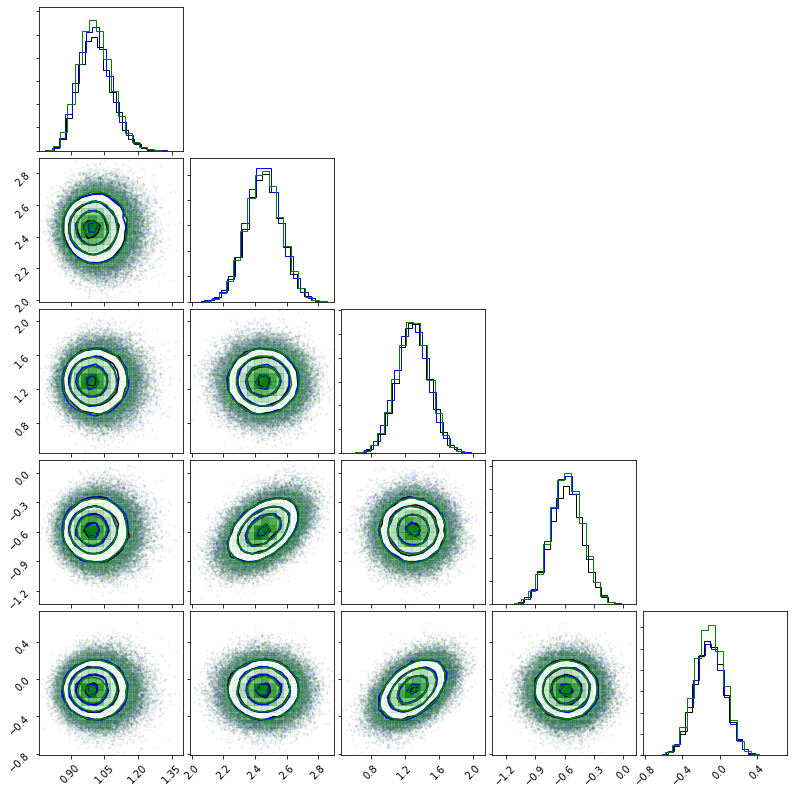

In [7]:
f = corner(data1)
f=corner(data2,fig=f,color='blue',weights= np.ones(len(data2))*len(data1)/len(data2))
f=corner(data3,fig=f,color='green',weights= np.ones(len(data3))*len(data1)/len(data3))